# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: CodeChallenge: dynamic learning rates
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [8]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Create the function and its derivative

In [9]:
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

### G.D. using a fixed learning rate

In [10]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsFixed[i,0] = localmin
  modelparamsFixed[i,1] = grad
  modelparamsFixed[i,2] = lr

/tmp/ipykernel_1576298/2377602908.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,0] = localmin
/tmp/ipykernel_1576298/2377602908.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsFixed[i,1] = grad


### G.D. using a gradient-based learning rate

In [11]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = lr

/tmp/ipykernel_1576298/113732522.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,0] = localmin
/tmp/ipykernel_1576298/113732522.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,1] = grad
/tmp/ipykernel_1576298/113732522.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsGrad[i,2] = lr


### G.D. using a time-based learning rate

In [12]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

/tmp/ipykernel_1576298/287006009.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,0] = localmin
/tmp/ipykernel_1576298/287006009.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparamsTime[i,1] = grad


### Plot the results

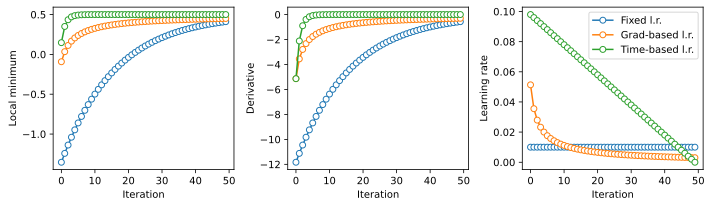

In [13]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()

# Additional explorations

In [14]:
# 1) Change the initial learning rate in the "time" experiment from .1 to .01. Do you still reach the same conclusion that
#    dynamic learning rates are better than a fixed learning rate?
# 
# 2) Compute the average of all time-based learning rates (see variable 'modelparamsTime'). Next, replace the fixed 
#    learning rate with the average over all dynamic learning rates. How does that affect the model's performance?
# 
# 3) Going back to the original code (without the modifications above), you saw that the fixed learning rate model didn't
#    get to the same local minimum. What happens if you increase the number of training epochs from 50 to 500? Does that 
#    improve the situation, and what does that tell you about the relationship between learning rate and training epochs?
# 
# 4) The code here initializes the starting value as a random number, which will differ for each learning rate method.
#    Is that appropriate or inappropriate for this experiment? Why? Change the code so that the starting value is the
#    same for all three learning rate models.
# 